In [2]:
!pip install smart_open

  Obtaining dependency information for smart_open from https://files.pythonhosted.org/packages/fc/d9/d97f1db64b09278aba64e8c81b5d322d436132df5741c518f3823824fae0/smart_open-6.4.0-py3-none-any.whl.metadata
Using cached smart_open-6.4.0-py3-none-any.whl (57 kB)


In [3]:
# Quick stackoverflow fix to import gensim:
import smart_open
smart_open.open = smart_open.smart_open

In [16]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7a/94/a1615bac6706eb8a58fe08675b80a11b5463ef9591176dd3e57257495774/matplotlib-3.8.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/55/14/0dc1884e3c04f9b073a47283f5d424926644250891db392a07c56f05e5c5/contourpy-1.1.1-cp310-cp310-win_amd64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/1c/c6/408ee90eae2fd7ef85c5baaedfc8d533805f4c54fc6670dbde9539f1277b/fonttools-4.42.1-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ------- ------------------------------- 30.7/154.1 kB 1.3 MB/s eta 0:00:01
     -------------- ---------------------- 61.4/154.1 kB 648.1 kB/s eta 0:00:01
     -------------------------- --------- 112.6/154.1 kB 9

In [17]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('refined_mock_data.csv')

In [19]:
df

,Username,food_ordered
0,usha,orange juice
1,rojan,veg momo
2,susan,chicken momo
3,usha,chicken chilly momo
4,rojina,veg momo
...,...,...
495,sunil,pepperoni pizza
496,anurag,chicken momo
497,ayushma,orange juice
498,anil,sprite


### Making the train value:

In [20]:
df['Username'] = df['Username'].astype(str)
customers = df['Username'].unique().tolist()
customers

['usha',
 'rojan',
 'susan',
 'rojina',
 'anurag',
 'anil',
 'ayushma',
 'aastha',
 'ayush',
 'sunil']

In [21]:
# List to capture order history of the customers 
o_train = []

# Populate the list with the orders:
for i in tqdm(customers):
    temp = df[df['Username'] == i]["food_ordered"].tolist()
    o_train.append(temp)  

100%|██████████| 10/10 [00:00<00:00, 293.75it/s]


In [22]:
o_train

[['orange juice',
  'chicken chilly momo',
  'mango juice',
  'mango juice',
  'chicken momo',
  'sprite',
  'sprite',
  'water',
  'chicken momo',
  'mango juice',
  'chicken fried momo',
  'coke',
  'pepperoni pizza',
  'sprite',
  'orange juice',
  'mango juice',
  'double cheese margherita pizza',
  'chicken momo',
  'Classic margherita pizza',
  'pepsi',
  'water',
  'pepperoni pizza',
  'coke',
  'coke',
  'guava juice',
  'chicken chilly momo',
  'sprite',
  'red bull',
  'double cheese margherita pizza',
  'double cheese margherita pizza',
  'chicken chilly momo',
  'Classic margherita pizza',
  'veg momo',
  'chicken chilly momo',
  'Classic margherita pizza',
  'veg momo',
  'sprite',
  'chicken fried momo',
  'red bull',
  'orange juice',
  'chicken chilly momo',
  'orange juice',
  'mango juice',
  'chicken momo'],
 ['veg momo',
  'coke',
  'pepsi',
  'coke',
  'chicken chilly momo',
  'water',
  'orange juice',
  'chicken momo',
  'veg momo',
  'water',
  'double cheese ma

## Making the neural network and training the data:

In [23]:
model = Word2Vec(window=3, min_count=1)

In [24]:
model.build_vocab(o_train, progress_per=200)

In [25]:
model.corpus_count

10

In [26]:
model.train(o_train, total_examples=model.corpus_count, epochs=7)

(436, 3500)

In [27]:
model.save("food_recommendation_model.model")

In [28]:
print(model)

Word2Vec<vocab=15, vector_size=100, alpha=0.025>


### Embedding obtained in a vector:

In [33]:
# Use .get_vector(key) to get vectors for each key
X = [model.wv.get_vector(key) for key in keys]

# Convert the list of vectors to a NumPy array
import numpy as np
X = np.array(X)

# Check the shape of the resulting array
print(X.shape)



(15, 100)


In [34]:
X

array([[-0.00144367,  0.00188923,  0.0054551 , ..., -0.00782962,
         0.00127229,  0.00786708],
       [-0.00953739,  0.00550599,  0.00568415, ..., -0.00326696,
        -0.00907858,  0.00625216],
       [-0.00137775,  0.00532367, -0.00640379, ..., -0.00037412,
         0.00867178, -0.0050576 ],
       ...,
       [-0.00268237, -0.00343299,  0.01002457, ...,  0.0050949 ,
         0.00711751,  0.00956868],
       [-0.01027836,  0.01112826, -0.00728533, ..., -0.0037901 ,
        -0.00608111,  0.01146183],
       [ 0.00679216,  0.01061921,  0.00149872, ...,  0.00755434,
        -0.00570356,  0.01085337]], dtype=float32)

Visualizing Word Vectors with t-SNE:

In [41]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    # Use .index_to_key to get a list of keys (words)
    keys = model.wv.index_to_key

    for word in keys:
        tokens.append(model.wv[word])
        labels.append(word)

    # Convert tokens list to a 2D NumPy array
    tokens = np.array(tokens)  # <-- Add this line

    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

# Usage example:
# tsne_plot(your_model)

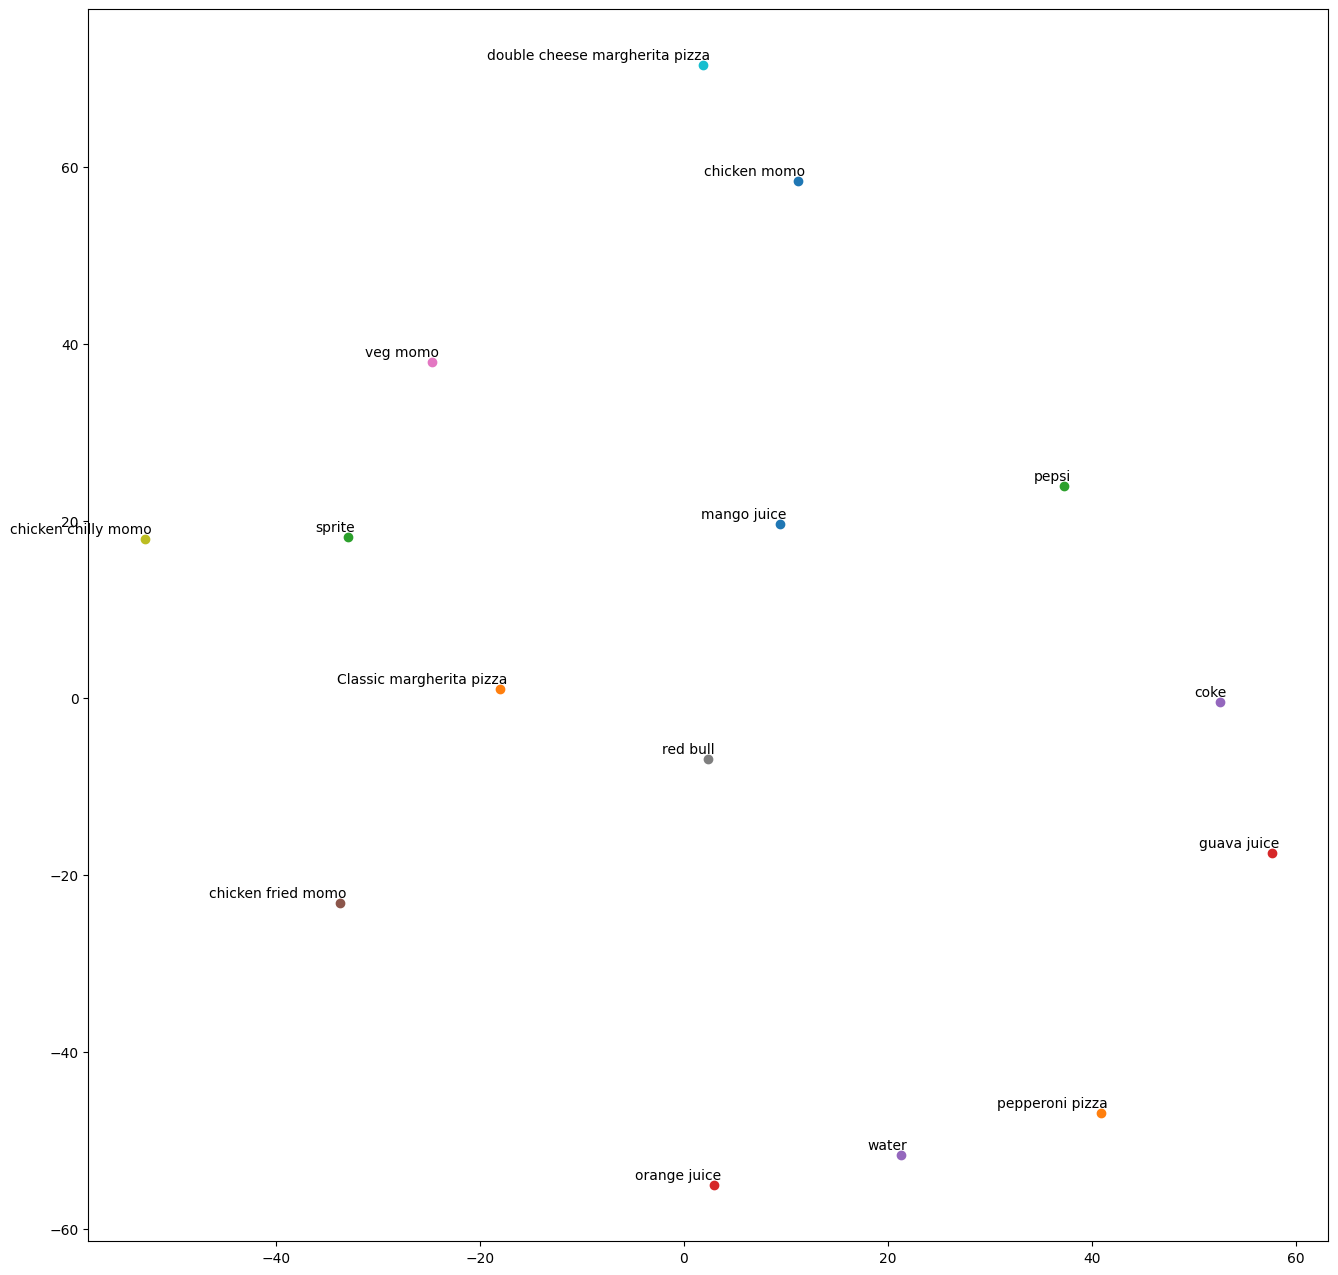

In [42]:
tsne_plot(model)

### Function to obtain all the similar products from the similarity vector:

In [47]:
orders = df[["food_ordered"]]
orders

,food_ordered
0,orange juice
1,veg momo
2,chicken momo
3,chicken chilly momo
4,veg momo
...,...
495,pepperoni pizza
496,chicken momo
497,orange juice
498,sprite


In [48]:
# remove duplicates
orders.drop_duplicates(inplace=True)
orders.head(50)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23668\532608100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders.drop_duplicates(inplace=True)


,food_ordered
0,orange juice
1,veg momo
2,chicken momo
3,chicken chilly momo
5,guava juice
6,mango juice
8,red bull
9,pepperoni pizza
11,coke
14,double cheese margherita pizza


In [49]:
orders_dict = orders.groupby('food_ordered')['food_ordered'].apply(list).to_dict()

In [54]:
def similar_products(v, n = 30):
    
    # extract most similar products for the input vector
    ms = model.wv.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        pair = (orders_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms      

In [55]:
similar_products(model.wv['red bull'])

[('mango juice', 0.2918200194835663),
 ('Classic margherita pizza', 0.2630225718021393),
 ('chicken momo', 0.24762283265590668),
 ('water', 0.23462693393230438),
 ('veg momo', 0.20996810495853424),
 ('sprite', 0.1781083047389984),
 ('orange juice', 0.17313604056835175),
 ('coke', 0.15812371671199799),
 ('pepsi', 0.14915424585342407),
 ('guava juice', 0.1326638162136078),
 ('double cheese margherita pizza', 0.08327006548643112),
 ('chicken fried momo', 0.0784902423620224),
 ('pepperoni pizza', 0.06957495957612991),
 ('chicken chilly momo', 0.01916567049920559)]

Function to average all the vectors of the products the user has bought so far and use the resultant to find similar products:


In [61]:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model.wv[i])
        except KeyError:
            continue
    
    if not product_vec:
        # Return a vector of zeros if none of the products are in the vocabulary
        return np.zeros(model.vector_size)
    
    return np.mean(product_vec, axis=0)


In [62]:
order_values = ['red bull', 'mango juice', 'coke']

vector_representation = aggregate_vectors(order_values)
vector_representation.shape

(100,)

In [64]:
similar_orders = similar_products(aggregate_vectors(order_values))

In [65]:
similar_orders

[('mango juice', 0.6816858649253845),
 ('coke', 0.6115648746490479),
 ('pepsi', 0.416211873292923),
 ('veg momo', 0.3904959261417389),
 ('Classic margherita pizza', 0.38195133209228516),
 ('guava juice', 0.3629714250564575),
 ('sprite', 0.3515879511833191),
 ('chicken momo', 0.3473570942878723),
 ('orange juice', 0.29930493235588074),
 ('chicken fried momo', 0.2725748121738434),
 ('water', 0.2437947690486908),
 ('double cheese margherita pizza', 0.20055030286312103),
 ('pepperoni pizza', 0.1974281668663025),
 ('chicken chilly momo', 0.1685395985841751)]

Filtering all the orders that user has already made:

In [ ]:
def filter_same_products(similar_prod, order_values):
    for order in order_values:
        for similar in similar_prod:
             if similar[0] == order:
                    similar_prod.remove(similar)
    return similar_prod